In [1]:
import cv2
import os
from keras.models import load_model
import numpy as np
from pygame import mixer
import time
import matplotlib.pyplot as plt

Using TensorFlow backend.


pygame 2.0.0 (SDL 2.0.12, python 3.7.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
mixer.init()
sound = mixer.Sound('alarm.wav')

try:
    face = cv2.CascadeClassifier('haar-cascade-files/haarcascade_frontalface_alt.xml')
    leye = cv2.CascadeClassifier('haar-cascade-files/haarcascade_lefteye_2splits.xml')
    reye = cv2.CascadeClassifier('haar-cascade-files/haarcascade_righteye_2splits.xml')
#     eyePair_cascade = cv2.CascadeClassifier('./haar-cascade/haarcascades_haarcascade_mcs_eyepair_big.xml') #eye_pair
    print("Cascade loaded successfully")
except:
    print("Can not open file")


lbl=['Close','Open']
try:
    model = load_model('my_modelexp1.h5')
    print("Model loaded successfully")
except:
    print("can not load model")
    
path = os.getcwd()

font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
thicc=2
rpred=[99]
lpred=[99]

Cascade loaded successfully
Model loaded successfully


In [3]:
try:
    cap = cv2.VideoCapture(1)
except:
    print("Can not initialize camera")

while(True):
    try:
        ret, frame = cap.read()
    except:
        print("Can not read image")
        
    height,width = frame.shape[:2] 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(5,5))
    
    left_eye = leye.detectMultiScale(gray)
    right_eye =  reye.detectMultiScale(gray)
    
    defaultPicture = np.zeros((60,150,1)) # black picture
    cv2.rectangle(frame, (0,height-50) , (200,height) , (0,0,0) , thickness=cv2.FILLED )

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (100,100,100) , 1 )

    for (x,y,w,h) in right_eye:
        r_eye=frame[y:y+h,x:x+w]
        count=count+1
        r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2GRAY)
        r_eye = cv2.resize(r_eye,(24,24))
        r_eye= r_eye/255
        r_eye=  r_eye.reshape(24,24,-1)
        r_eye = np.expand_dims(r_eye,axis=0)
        rpred = model.predict_classes(r_eye)
        if(rpred[0]==0):
            lbl='Open' 
        if(rpred[0]==1):
            lbl='Closed'
        break

    for (x,y,w,h) in left_eye:
        l_eye=frame[y:y+h,x:x+w]
        count=count+1
        l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2GRAY)  
        l_eye = cv2.resize(l_eye,(24,24))
        l_eye= l_eye/255
        l_eye=l_eye.reshape(24,24,-1)
        l_eye = np.expand_dims(l_eye,axis=0)
        lpred = model.predict_classes(l_eye)
        if(lpred[0]==1):
            lbl='Open'   
        if(lpred[0]==0):
            lbl='Closed'
        break

    if(rpred[0]==0 and lpred[0]==0):
        score=score+1
        cv2.putText(frame,"Closed",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    # if(rpred[0]==1 or lpred[0]==1):
    else:
        score=score-1
        cv2.putText(frame,"Open",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    
        
    if(score<0):
        score=0   
    cv2.putText(frame,'Score:'+str(score),(100,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    if(score>15):
        #person is feeling sleepy so we beep the alarm
        cv2.imwrite(os.path.join(path,'image.jpg'),frame)
        try:
            sound.play()
            
        except:  # isplaying = False
            pass
        if(thicc<16):
            thicc= thicc+2
        else:
            thicc=thicc-2
            if(thicc<2):
                thicc=2
        cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc) 
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


In [4]:
print(frame)

[[[208 144 113]
  [205 142 111]
  [204 140 110]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[208 144 113]
  [206 143 112]
  [200 141 110]
  ...
  [255 255 254]
  [255 255 254]
  [255 255 254]]

 [[209 146 113]
  [206 143 110]
  [200 141 108]
  ...
  [255 255 254]
  [255 255 254]
  [255 255 254]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [208 231 229]
  [209 233 230]
  [213 236 234]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [205 231 228]
  [211 232 230]
  [213 234 232]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [210 231 229]
  [215 233 232]
  [214 232 230]]]


In [5]:
cap.read()

(False, None)

TypeError: Invalid shape (1, 24, 24, 1) for image data

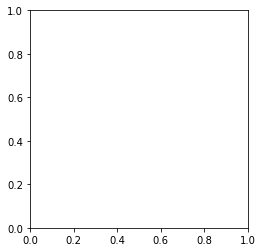

In [6]:
plt.imshow(l_eye)